In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_procs = np.loadtxt('gpu_scalability.txt')[:,1] / 4
tot = np.loadtxt('gpu_scalability.txt')[:,2] / 1000
comp = np.loadtxt('gpu_scalability.txt')[:,3] / 1000

data = pd.DataFrame({'group': n_procs, 'total_time': tot, 
                     'communication_time': tot - comp})

group_stats = data.groupby('group')[['total_time', 'communication_time']].mean()

l = len(group_stats['total_time'])
nodes = [data['group'][(i+1) * l] for i in range(l-1, -1, -1)]
t_i = [group_stats['total_time'].iloc[i] for i in range(l)]
speedup = t_i[0] / t_i
efficiency = speedup / nodes

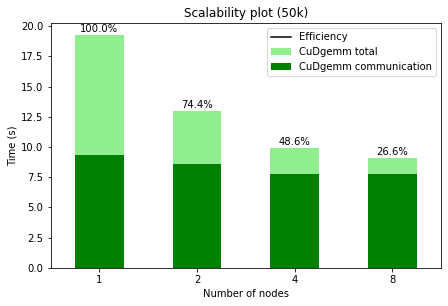

In [128]:
fig = plt.figure(figsize=(7,4.5))
ax = group_stats['total_time'].plot(kind='bar', 
                                    color='lightgreen', 
                                    label='CuDgemm total')
group_stats['communication_time'].plot(kind='bar', 
                                       color='green', 
                                       ax=ax, label='CuDgemm communication')
# Add text annotations on top of the bars
for i, bar in enumerate(ax.containers[0]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{np.around(efficiency[i], 3)*100}%', ha='center', va='bottom', color='black')
ax.plot([], [], color='black', label='Efficiency')

xtick_locations = [0, 1, 2, 3]
xtick_labels = ['1', '2', '4', '8']
plt.xticks(xtick_locations, xtick_labels)
plt.xticks(rotation=0)
plt.xlabel('Number of nodes')
plt.ylabel('Time (s)')
plt.title('Scalability plot (50k)')
plt.legend()
plt.gcf().set_facecolor('white')
fig.savefig('C:/Nicola/universita/Data_science/Parallel Programming/CuDgemm50k.png', dpi=150)
plt.show()

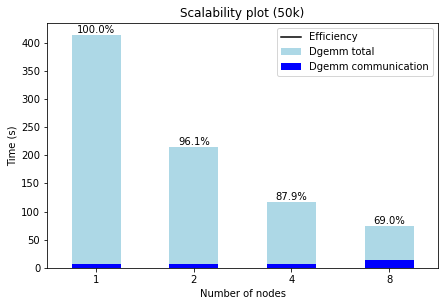

In [126]:
n_procs = np.loadtxt('dgemm_scalability.txt')[:,1] / 32
comm = np.loadtxt('dgemm_scalability.txt')[:,2]
comp = np.loadtxt('dgemm_scalability.txt')[:,3]

data = pd.DataFrame({'group': n_procs, 'total_time': comm + comp, 
                     'communication_time': comm})

group_stats = data.groupby('group')[['total_time', 'communication_time']].mean()
l = len(group_stats['total_time'])
nodes = [1, 2, 4, 8]
t_i = [group_stats['total_time'].iloc[i] for i in range(l)]
speedup = t_i[0] / t_i
efficiency = speedup / nodes

fig = plt.figure(figsize=(7,4.5))
ax = group_stats['total_time'].plot(kind='bar', 
                                    color='lightblue', 
                                    label='Dgemm total')
group_stats['communication_time'].plot(kind='bar', 
                                       color='blue', 
                                       ax=ax, label='Dgemm communication')

# Add text annotations on top of the bars
for i, bar in enumerate(ax.containers[0]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{np.around(efficiency[i], 3)*100}%', ha='center', va='bottom', color='black')
ax.plot([], [], color='black', label='Efficiency')
    
xtick_locations = [0, 1, 2, 3]
xtick_labels = ['1', '2', '4', '8']
plt.xticks(xtick_locations, xtick_labels)
plt.xticks(rotation=0)
plt.xlabel('Number of nodes')
plt.ylabel('Time (s)')
plt.title('Scalability plot (50k)')
plt.legend()
plt.gcf().set_facecolor('white')
fig.savefig('C:/Nicola/universita/Data_science/Parallel Programming/Dgemm50k.png', dpi=150)
plt.show()

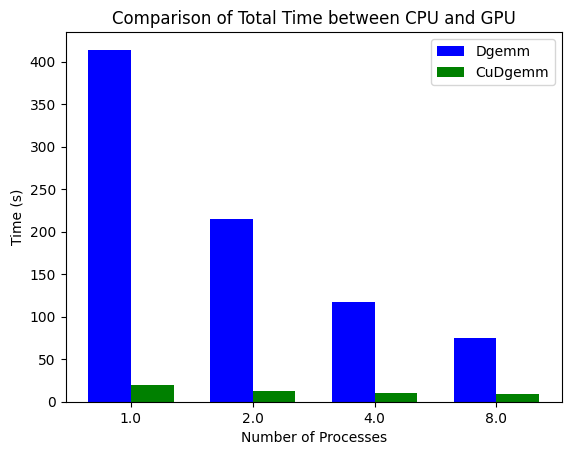

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data from gpu_scalability.txt
n_procs_gpu = np.loadtxt('gpu_scalability.txt')[:,1] / 4
tot_gpu = np.loadtxt('gpu_scalability.txt')[:,2] / 1000
comp_gpu = np.loadtxt('gpu_scalability.txt')[:,3] / 1000

data_gpu = pd.DataFrame({'group': n_procs_gpu, 'total_time': tot_gpu, 
                     'communication_time': tot_gpu - comp_gpu})

group_stats_gpu = data_gpu.groupby('group')[['total_time', 'communication_time']].mean()

# Load data from dgemm_scalability.txt
n_procs_dgemm = np.loadtxt('dgemm_scalability.txt')[:,1] / 32
comm_dgemm = np.loadtxt('dgemm_scalability.txt')[:,2]
comp_dgemm = np.loadtxt('dgemm_scalability.txt')[:,3]

tot_dgemm = comm_dgemm + comp_dgemm

data_dgemm = pd.DataFrame({'group': n_procs_dgemm, 'total_time': tot_dgemm, 
                     'communication_time': tot_dgemm - comp_dgemm})

group_stats_dgemm = data_dgemm.groupby('group')[['total_time', 'communication_time']].mean()

# Plotting
fig, ax = plt.subplots()
index = np.arange(len(group_stats_gpu))
width = 0.35

rects1 = ax.bar(index, group_stats_dgemm['total_time'], width, color='b')
rects2 = ax.bar(index + width, group_stats_gpu['total_time'], width, color='g')

# Customizing the plot
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_title('Comparison of Total Time between CPU and GPU')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(group_stats_gpu.index)
ax.legend((rects1[0], rects2[0]), ('Dgemm', 'CuDgemm'))
fig.savefig('C:/Nicola/universita/Data_science/Parallel Programming/Comparison.png', dpi=150)
plt.show()